<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

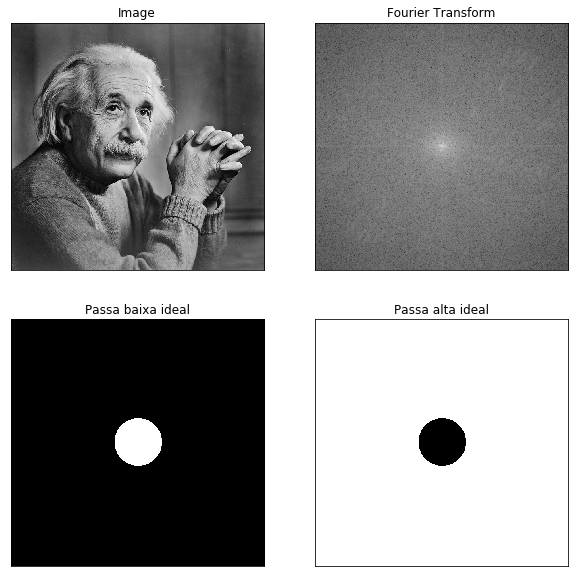

<Figure size 432x288 with 0 Axes>

In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('einstein.jpg',0)
img2 = cv2.imread('lena.jpeg',0)
height, width = img.shape

# fft convertendo a imagem para o dominio da frequencia

f = np.fft.fft2(img)

fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow,ccol = int(rows/2) ,int(cols/2)

plt.figure("Input")

magnitude_spectrum = 20*np.log(np.abs(fshift))

r = 60
h_Filter_Low_Pass = np.zeros(img.size, img.dtype).reshape(img.shape)
for icounter in range(1, height):
    for jcounter in range(1, width):
        if ((icounter - height/2)**2 + (jcounter - width/2)**2) < r**2:
            h_Filter_Low_Pass[icounter, jcounter] = 1


plt.figure(figsize=(10,10))
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Fourier Transform'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow((h_Filter_Low_Pass), cmap = 'gray')
plt.title('Passa baixa ideal'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow((h_Filter_Low_Pass-1), cmap = 'gray')
plt.title('Passa alta ideal'), plt.xticks([]), plt.yticks([])
#filter_fft = np.log(np.abs(np.fft.fftshift(np.fft.fft2(h_Filter_Low_Pass))))
#plt.subplot(224),plt.imshow(h_fft, cmap = 'gray')
#plt.title('Fourier Transform (Filter)'), plt.xticks([]), plt.yticks([])


plt.figure("Output")


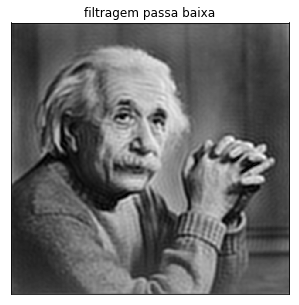

In [42]:
pb = fshift * h_Filter_Low_Pass
#g_ifft = np.log(g+1)
pb_ifft = np.fft.ifftshift(pb)
pb_ifft = np.fft.ifft2(pb_ifft)
pb_ifft = (np.abs(pb_ifft))

plt.figure(figsize=(5,5))
plt.subplot(),plt.imshow(pb_ifft, cmap = 'gray')
plt.title('filtragem passa baixa'), plt.xticks([]), plt.yticks([])
plt.show()

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

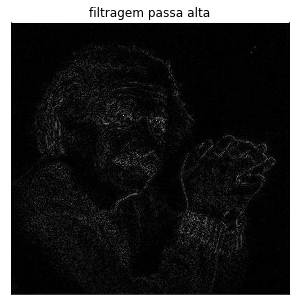

In [43]:

pa = fshift * (h_Filter_Low_Pass-1)
#g_ifft = np.log(g+1)
pa_ifft = np.fft.ifftshift(pa)
pa_ifft = np.fft.ifft2(pa_ifft)
pa_ifft = (np.abs(pa_ifft))

plt.figure(figsize=(5,5))
plt.plot(),plt.imshow(pa_ifft, cmap = 'gray')
plt.title('filtragem passa alta') 
plt.xticks([]), plt.yticks([])

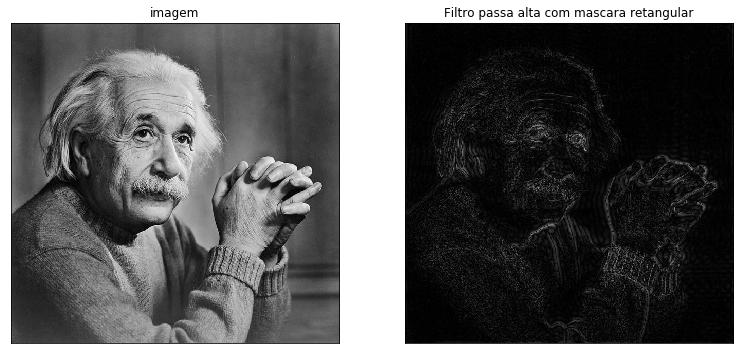

In [44]:
# mascara retangular 60x60
# High Pass Filter (HPF)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

# shift back (we shifted the center before)
f_ishift = np.fft.ifftshift(fshift)

# inverse fft to get the image back 
img_back = np.fft.ifft2(f_ishift)

img_back = np.abs(img_back)

plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('imagem'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtro passa alta com mascara retangular') 
plt.xticks([]), plt.yticks([])

plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in divide


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

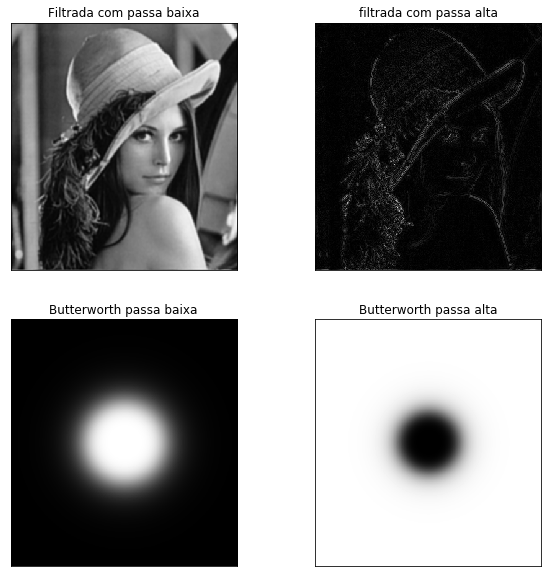

In [45]:
#filtragem de butterworth na frequência

#lendo uma nova imagem de entrada

img = cv2.imread('lena.jpeg',0)
height, width = img.shape

# fft convertendo a imagem para o dominio da frequencia

f = np.fft.fft2(img)

fshift = np.fft.fftshift(f)

linhas, colunas = img.shape
clinhas,ccolunas = linhas/2 ,colunas/2

#Parâmetros para projeto
x, y = np.ogrid[:linhas, :colunas]                   #cria vetores x e y 
centro = [clinhas, ccolunas]  

n = 3                                              #ordem do filtro

D0 = 60

D = np.sqrt((x-np.array(centro)[0]) ** 2 + (y-np.array(centro)[1]) ** 2)

ButHP = (1+ (np.sqrt(2)-1)*((D0/D)**(2*n)))**-1         #funcao butter pa
ButLP = (1+ (np.sqrt(2)-1)*((D/D0)**(2*n)))**-1         #funcao butter pb

BWPB = fshift * ButLP                                   
BWPA = fshift * ButHP

## transformada inversa 
BWPA_ifft = np.fft.ifftshift(BWPA)               
BWPA_ifft = np.fft.ifft2(BWPA_ifft)                 
BWPA_ifft = np.abs(BWPA_ifft)

BWPB_ifft = np.fft.ifftshift(BWPB)               
BWPB_ifft = np.fft.ifft2(BWPB_ifft)                 
BWPB_ifft = np.abs(BWPB_ifft)                                         

#plotagem dos resultados

plt.figure(figsize=(10,10))
plt.subplot(221),plt.imshow(BWPB_ifft, cmap = 'gray')
plt.title('Filtrada com passa baixa'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(BWPA_ifft, cmap = 'gray')
plt.title('filtrada com passa alta'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow((ButLP), cmap = 'gray')
plt.title('Butterworth passa baixa'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(ButHP, cmap = 'gray')
plt.title('Butterworth passa alta'), plt.xticks([]), plt.yticks([])
plt.xticks([]), plt.yticks([])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

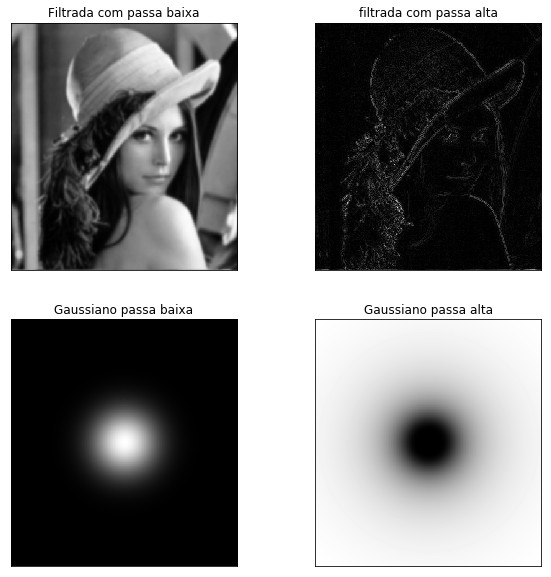

In [46]:
#filtragem gaussiana na frequência

sigma=50

GaHP = np.e**((sigma**2)/(-D**2 ))                    #funcao gaussiana pa
GaLP = np.e**((-D**2 )/(sigma**2))                    #funcao gaussiana pb

GAPB = fshift*GaLP                                   #aplicando filtro
GAPA = fshift*GaHP                                   #aplicando filtro 

## transformada inversa 
GAPB_ifft = np.fft.ifftshift(GAPB)               
GAPB_ifft = np.fft.ifft2(GAPB_ifft)                 
GAPB_ifft = np.abs(GAPB_ifft)                       

GAPA_ifft = np.fft.ifftshift(GAPA)               
GAPA_ifft = np.fft.ifft2(GAPA_ifft)                 
GAPA_ifft = np.abs(GAPA_ifft)                       

#plotagem dos resultados

plt.figure(figsize=(10,10))
plt.subplot(221),plt.imshow(GAPB_ifft, cmap = 'gray')
plt.title('Filtrada com passa baixa'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(GAPA_ifft, cmap = 'gray')
plt.title('filtrada com passa alta'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(GaLP, cmap = 'gray')
plt.title('Gaussiano passa baixa'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(GaHP, cmap = 'gray')
plt.title('Gaussiano passa alta'), plt.xticks([]), plt.yticks([])
plt.xticks([]), plt.yticks([])


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in divide


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

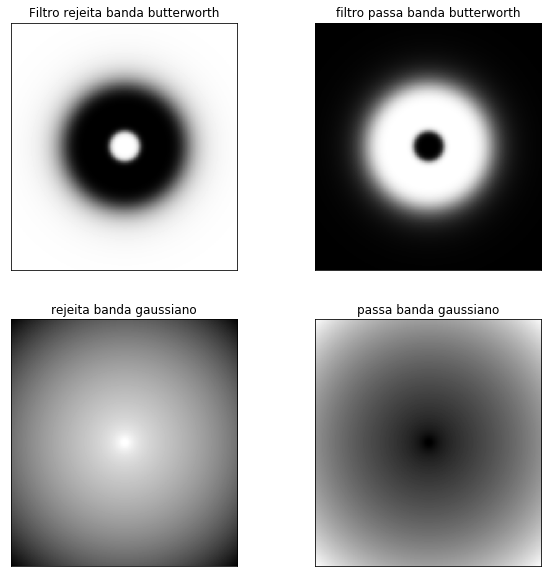

In [64]:
#Filtros Passa banda e Rejeita banda

img = cv2.imread('lena.jpeg',0)

height, width = img.shape

# aplicando fft na imagem

f = np.fft.fft2(img)

fshift = np.fft.fftshift(f)

linhas, colunas = img.shape
clinhas,ccolunas = linhas/2 ,colunas/2

#Parâmetros para projeto
x, y = np.ogrid[:linhas, :colunas]                   #cria vetores x e y 
centro = [clinhas, ccolunas]                           #define o centro da imagem
n = 3                                           #ordem do filtro
w = 80                                         # largura de banda
D0 = 50
sigma = 50

D = np.sqrt((x-np.array(centro)[0]) ** 2 + (y-np.array(centro)[1]) ** 2)                     

Butt_RB = (1+(D*w/(D**2-D0**2))**(2*n))**-1               #filtro butterworth rejeita banda
Butt_PB = 1 - Butt_RB                                     #filtro butterworth passa banda

Gauss_RB = 1-(np.e**(((D**2-sigma**2)/(D * w))*0.5))      #filtro Gaussiano rejeita banda
Gauss_PB = (1 - Gauss_RB)                                   #filtro Gaussiano passa banda



plt.figure(figsize=(10,10))
plt.subplot(221),plt.imshow(Butt_RB, cmap = 'gray')
plt.title('Filtro rejeita banda butterworth'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(Butt_PB, cmap = 'gray')
plt.title('filtro passa banda butterworth'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(Gauss_RB, cmap = 'gray')
plt.title('rejeita banda gaussiano'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(Gauss_PB, cmap = 'gray')
plt.title('passa banda gaussiano'), plt.xticks([]), plt.yticks([])
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

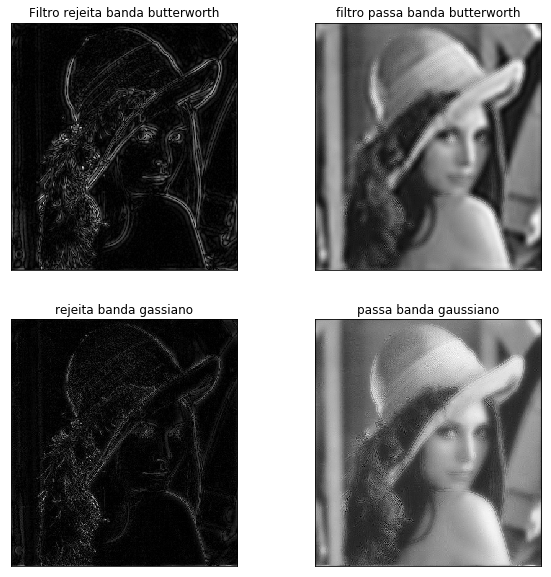

In [66]:
#Aplicando os filtros a imagem

BWPB = fshift * Butt_PB                                   
BWRB = fshift * Butt_RB

## transformada inversa 
BWPB_ifft = np.fft.ifftshift(BWPB)               
BWPB_ifft = np.fft.ifft2(BWPB_ifft)                 
BWPB_ifft = np.abs(BWPB_ifft)

BWRB_ifft = np.fft.ifftshift(BWRB)               
BWRB_ifft = np.fft.ifft2(BWRB_ifft)                 
BWRB_ifft = np.abs(BWRB_ifft) 

GAPB = fshift*Gauss_PB                                   #aplicando filtro
GARB = fshift*Gauss_RB                                  #aplicando filtro 

## transformada inversa 
GAPB_ifft = np.fft.ifftshift(GAPB)               
GAPB_ifft = np.fft.ifft2(GAPB_ifft)                 
GAPB_ifft = np.abs(GAPB_ifft)                       

GARB_ifft = np.fft.ifftshift(GARB)               
GARB_ifft = np.fft.ifft2(GARB_ifft)                 
GARB_ifft = np.abs(GARB_ifft)

#Plotando as imagens de saída
plt.figure(figsize=(10,10))
plt.subplot(221),plt.imshow(BWPB_ifft, cmap = 'gray')
plt.title('Filtro rejeita banda butterworth'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(BWRB_ifft, cmap = 'gray')
plt.title('filtro passa banda butterworth'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(GAPB_ifft, cmap = 'gray')
plt.title('rejeita banda gassiano'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(GARB_ifft, cmap = 'gray')
plt.title('passa banda gaussiano'), plt.xticks([]), plt.yticks([])
plt.xticks([]), plt.yticks([])